In [1]:
#As always start with the necessary libraries
import random
import json
import numpy
import matplotlib.pyplot as plt
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [2]:
#Now lets read the json file that contains the information for the problem
with open("gr17.json", "r") as tsp_data:
    tsp = json.load(tsp_data)

In [28]:
#Save the distance matrix in a separate variable
distance_map = tsp["DistanceMatrix"]

In [29]:
#Save the number of cities to visit
IND_SIZE = tsp["TourSize"]

In [30]:
#Now create the objects to define the problem and the individual
creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("Individual", list, fitness = creator.FitnessMin)

In [31]:
#Now the creation of the toolbox
toolbox = base.Toolbox()
#Generation of a random tour
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
#Generation of individuals and population
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 100)

In [32]:
#Now the definition of the target function
def evalTSP(individual):
    #Distance between the last element and the first
    distance = distance_map[individual[-1]][individual[0]]
    #Distance between the rest of the cities
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

In [33]:
#Register of the genetic operations
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 0.05)
toolbox.register("select", tools.selTournament, tournsize = 3)
toolbox.register("evaluate", evalTSP)

In [34]:
#Definition of the plotting function
def plot_evolution(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_avgs = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_avgs, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, where = fit_maxs >= fit_mins, facecolor = "g", alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min","Max","Avg"])
    ax1.set_ylim([2000,6000])
    plt.grid(True)
    #plt.savefig("EvolutionTSP.eps", dpi = 300)

In [35]:
#Now definition if the main function
def main():
    random.seed(100)
    CXPB, MUTPB, NGEN = 0.7, 0.3, 120
    population = toolbox.population()
    MU, LAMBDA = len(population), len(population)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    logbook = tools.Logbook()
    population, logbook = algorithms.eaMuPlusLambda(population, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats=stats, halloffame=hof)
    return hof, logbook

gen	nevals	avg    	std    	min 	max 
0  	100   	4676.44	429.018	3682	5519
1  	100   	4301.35	335.665	3682	5211
2  	100   	4045.42	280.624	3372	4747
3  	100   	3837.64	212.346	3372	4298
4  	100   	3679.43	185.745	3327	4260
5  	100   	3546.83	152.571	3047	3986
6  	100   	3419.66	175.716	2909	3976
7  	100   	3348.5 	186.321	2909	3812
8  	100   	3242.51	153.841	2909	3496
9  	100   	3127.2 	155.873	2806	3412
10 	100   	3020.28	148.239	2780	3412
11 	100   	2903.78	97.4645	2763	3244
12 	100   	2847.06	71.61  	2590	3130
13 	100   	2817.29	80.5238	2590	3264
14 	100   	2768.84	80.306 	2496	3026
15 	100   	2719.83	95.9949	2418	2903
16 	100   	2649.8 	108.833	2418	2823
17 	100   	2564   	113.183	2296	2780
18 	100   	2494.67	93.8402	2296	2692
19 	100   	2423.89	85.4715	2261	2729
20 	100   	2369.61	76.0196	2261	2783
21 	100   	2327.38	53.7522	2261	2496
22 	100   	2291.53	25.0597	2261	2418
23 	100   	2275.79	17.5609	2245	2296
24 	100   	2264.85	13.938 	2245	2296
25 	100   	2255.73	12.0937	2199	2296
2

ValueError: where size (1) does not match x size (121)

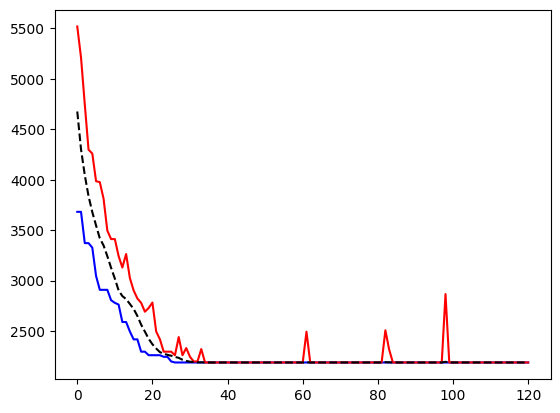

In [36]:
#Now the usage of the algorithm
if __name__ == "__main__":
    best, log = main()
    print("Mejor fitness: ", best[0].fitness.values)
    print("Mejor individuo: ", best[0])
    plot_evolution(log)